In [1]:
!pip install ipython-sql
!pip install psycopg2
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as pd_sql

# We are also going to do some basic viz
#import matplotlib.pyplot as plt
#%matplotlib inline
%load_ext sql

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
connection_args = {
    'host': 'localhost',
    'user': 'postgres',
    'dbname': 'project3',
    'password': '0162352!',
    'port': 5432             
}

connection = pg.connect(**connection_args)

In [4]:
query_sub_accident = "SELECT * FROM sub_accident;"

df_sub_accident = pd_sql.read_sql(query_sub_accident, connection)
df_sub_accident.describe()

,st_case,latitude,longitud,ve_total,ve_forms,peds,pernotmvit,persons,county,day,...,rel_road,lgt_cond,weather,tow_veh,vtrafway,vnum_lan,vspd_lim,male_num,female_num,drunk_dr
count,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,...,32166.000000,32166.000000,32166.000000,32130.000000,32130.000000,32130.000000,32130.000000,32130.000000,32130.000000,32166.000000
mean,276729.623733,37.011498,-85.209389,1.556177,1.520954,0.214854,0.223746,2.290493,91.225051,15.556208,...,2.386619,1.888360,3.808711,0.152537,1.878556,2.610831,51.598195,1.478462,0.392312,0.283187
std,162486.332746,7.164869,87.153916,0.889722,0.852961,0.480884,0.507696,1.945197,94.670319,8.774020,...,4.525417,1.146641,10.581454,0.734884,1.362884,1.200805,16.767387,1.278314,0.922465,0.467420
min,10001.000000,19.273050,-166.549556,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122183.250000,33.135731,-97.830091,1.000000,1.000000,0.000000,0.000000,1.000000,31.000000,8.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,40.000000,1.000000,0.000000,0.000000
50%,280002.500000,36.427731,-87.641267,1.000000,1.000000,0.000000,0.000000,2.000000,71.000000,15.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,55.000000,1.000000,0.000000,0.000000
75%,420565.750000,40.640503,-81.308249,2.000000,2.000000,0.000000,0.000000,3.000000,115.000000,23.000000,...,4.000000,2.000000,2.000000,0.000000,2.000000,3.000000,60.000000,2.000000,0.000000,1.000000
max,560130.000000,99.999900,999.999900,58.000000,58.000000,16.000000,16.000000,93.000000,999.000000,31.000000,...,99.000000,9.000000,99.000000,26.000000,9.000000,9.000000,99.000000,57.000000,54.000000,3.000000


In [5]:
df_sub_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32166 entries, 0 to 32165
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   st_case     32166 non-null  float64
 1   latitude    32166 non-null  float64
 2   longitud    32166 non-null  float64
 3   ve_total    32166 non-null  float64
 4   ve_forms    32166 non-null  float64
 5   peds        32166 non-null  float64
 6   pernotmvit  32166 non-null  float64
 7   persons     32166 non-null  float64
 8   county      32166 non-null  float64
 9   day         32166 non-null  float64
 10  month       32166 non-null  float64
 11  day_week    32166 non-null  float64
 12  hour        32166 non-null  float64
 13  nhs         32166 non-null  float64
 14  func_sys    32166 non-null  float64
 15  rd_owner    32166 non-null  float64
 16  route       32166 non-null  float64
 17  harm_ev     32166 non-null  float64
 18  man_coll    32166 non-null  float64
 19  typ_int     32166 non-nul

In [5]:
maper = {2: 1,
         3: 1} 
df_sub_accident['drunk_dr'] = df_sub_accident['drunk_dr'].map(maper).fillna(df_sub_accident['drunk_dr'])

In [6]:
msk1 = (df_sub_accident.drunk_dr<2)
df_sub_accident=df_sub_accident[msk1]

msk2 = (df_sub_accident.county<996)
df_sub_accident=df_sub_accident[msk2]

msk3 = (df_sub_accident.hour<24)
df_sub_accident=df_sub_accident[msk3]

msk4 = (df_sub_accident.nhs<2)
df_sub_accident=df_sub_accident[msk4]

msk5 = (df_sub_accident.func_sys<97)
df_sub_accident=df_sub_accident[msk5]

msk6 = (df_sub_accident.rd_owner<97)
df_sub_accident=df_sub_accident[msk6]

msk7 = (df_sub_accident.route<9)
df_sub_accident=df_sub_accident[msk7]

msk8 = (df_sub_accident.harm_ev<98)
df_sub_accident=df_sub_accident[msk8]

msk9 = (df_sub_accident.man_coll<98)
df_sub_accident=df_sub_accident[msk9]

msk10 = (df_sub_accident.typ_int<98)
df_sub_accident=df_sub_accident[msk10]

msk11 = (df_sub_accident.rel_road<98)
df_sub_accident=df_sub_accident[msk11]

msk12 = (df_sub_accident.lgt_cond<8)
df_sub_accident=df_sub_accident[msk12]

msk13 = (df_sub_accident.weather<97)
df_sub_accident=df_sub_accident[msk13]

msk14 = (df_sub_accident.tow_veh<9)
df_sub_accident=df_sub_accident[msk14]

msk15 = (df_sub_accident.vtrafway<8)
df_sub_accident=df_sub_accident[msk15]

msk16 = (df_sub_accident.vnum_lan<8)
df_sub_accident=df_sub_accident[msk16]

msk17 = (df_sub_accident.vspd_lim<98)
df_sub_accident=df_sub_accident[msk17]

In [7]:
df_sub_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21414 entries, 0 to 32165
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   st_case     21414 non-null  float64
 1   latitude    21414 non-null  float64
 2   longitud    21414 non-null  float64
 3   ve_total    21414 non-null  float64
 4   ve_forms    21414 non-null  float64
 5   peds        21414 non-null  float64
 6   pernotmvit  21414 non-null  float64
 7   persons     21414 non-null  float64
 8   county      21414 non-null  float64
 9   day         21414 non-null  float64
 10  month       21414 non-null  float64
 11  day_week    21414 non-null  float64
 12  hour        21414 non-null  float64
 13  nhs         21414 non-null  float64
 14  func_sys    21414 non-null  float64
 15  rd_owner    21414 non-null  float64
 16  route       21414 non-null  float64
 17  harm_ev     21414 non-null  float64
 18  man_coll    21414 non-null  float64
 19  typ_int     21414 non-nul

In [10]:
df_sub_accident.isna().sum()

st_case       0
latitude      0
longitud      0
ve_total      0
ve_forms      0
peds          0
pernotmvit    0
persons       0
county        0
day           0
month         0
day_week      0
hour          0
nhs           0
func_sys      0
rd_owner      0
route         0
harm_ev       0
man_coll      0
typ_int       0
rel_road      0
lgt_cond      0
weather       0
tow_veh       0
vtrafway      0
vnum_lan      0
vspd_lim      0
male_num      0
female_num    0
drunk_dr      0
dtype: int64

In [8]:
import statistics
from sklearn import metrics, datasets, preprocessing, model_selection, svm, naive_bayes, neighbors, ensemble
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb

In [9]:
label_encoder = preprocessing.LabelEncoder() #label encoding on class_label before logistic regression
df_sub_accident['county']= label_encoder.fit_transform(df_sub_accident['county']) 
df_sub_accident['county'].unique()
df_sub_accident['day']= label_encoder.fit_transform(df_sub_accident['day']) 
df_sub_accident['day'].unique()
df_sub_accident['month']= label_encoder.fit_transform(df_sub_accident['month']) 
df_sub_accident['month'].unique()
df_sub_accident['day_week']= label_encoder.fit_transform(df_sub_accident['day_week']) 
df_sub_accident['day_week'].unique()
df_sub_accident['hour']= label_encoder.fit_transform(df_sub_accident['hour']) 
df_sub_accident['hour'].unique()
df_sub_accident['nhs']= label_encoder.fit_transform(df_sub_accident['nhs']) 
df_sub_accident['nhs'].unique()
df_sub_accident['func_sys']= label_encoder.fit_transform(df_sub_accident['func_sys']) 
df_sub_accident['func_sys'].unique()
df_sub_accident['rd_owner']= label_encoder.fit_transform(df_sub_accident['rd_owner']) 
df_sub_accident['rd_owner'].unique()
df_sub_accident['route']= label_encoder.fit_transform(df_sub_accident['route']) 
df_sub_accident['route'].unique()
df_sub_accident['harm_ev']= label_encoder.fit_transform(df_sub_accident['harm_ev']) 
df_sub_accident['harm_ev'].unique()
df_sub_accident['man_coll']= label_encoder.fit_transform(df_sub_accident['man_coll']) 
df_sub_accident['man_coll'].unique()
df_sub_accident['typ_int']= label_encoder.fit_transform(df_sub_accident['typ_int']) 
df_sub_accident['typ_int'].unique()
df_sub_accident['rel_road']= label_encoder.fit_transform(df_sub_accident['rel_road']) 
df_sub_accident['rel_road'].unique()
df_sub_accident['lgt_cond']= label_encoder.fit_transform(df_sub_accident['lgt_cond']) 
df_sub_accident['lgt_cond'].unique()
df_sub_accident['weather']= label_encoder.fit_transform(df_sub_accident['weather']) 
df_sub_accident['weather'].unique()
df_sub_accident['tow_veh']= label_encoder.fit_transform(df_sub_accident['tow_veh']) 
df_sub_accident['tow_veh'].unique()
df_sub_accident['vtrafway']= label_encoder.fit_transform(df_sub_accident['vtrafway']) 
df_sub_accident['vtrafway'].unique()
df_sub_accident['vnum_lan']= label_encoder.fit_transform(df_sub_accident['vnum_lan']) 
df_sub_accident['vnum_lan'].unique()
df_sub_accident['vspd_lim']= label_encoder.fit_transform(df_sub_accident['vspd_lim']) 
df_sub_accident['vspd_lim'].unique()
df_sub_accident.head()

,st_case,latitude,longitud,ve_total,ve_forms,peds,pernotmvit,persons,county,day,...,rel_road,lgt_cond,weather,tow_veh,vtrafway,vnum_lan,vspd_lim,male_num,female_num,drunk_dr
0,10001.0,33.878653,-87.325328,1.0,1.0,0.0,0.0,1.0,75,0,...,3,1,0,0,1,2,11,1.0,0.0,1.0
1,10002.0,34.910442,-86.908708,1.0,1.0,0.0,0.0,1.0,50,0,...,2,1,8,0,3,2,14,1.0,0.0,0.0
2,10003.0,32.142006,-85.758456,1.0,1.0,0.0,0.0,2.0,6,0,...,3,1,0,0,1,2,11,1.0,1.0,1.0
3,10004.0,31.439814,-85.510300,1.0,1.0,0.0,0.0,1.0,28,3,...,3,1,8,0,1,2,11,1.0,0.0,1.0
4,10005.0,31.319331,-85.515100,2.0,2.0,0.0,0.0,2.0,28,6,...,0,0,0,0,2,2,13,2.0,0.0,0.0


In [10]:
X = df_sub_accident.loc[:,['ve_total', 've_forms', 'peds', 'pernotmvit', 'persons', 'county','day', 
                           'month','day_week', 'hour', 'nhs', 'func_sys', 'rd_owner', 'route', 
                           'harm_ev','man_coll', 'typ_int', 'rel_road', 'lgt_cond','weather', 'tow_veh', 'vtrafway', 'vnum_lan', 'vspd_lim', 'male_num', 'female_num']]
y = df_sub_accident['drunk_dr']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [12]:
#Logistic regression classifier
LR = LogisticRegression(solver= 'liblinear', fit_intercept = True)
results_LR = LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Train accuracy:', LR.score(X_train, y_train))
print('Test accuracy:', LR.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred), 
                                                                recall_score(y_test, y_pred), f1_score(y_test, y_pred)))

Train accuracy: 0.7426779638401494
Test accuracy: 0.739455252918288
Precision:0.5701,   Recall:0.2358, F1:0.3336


In [31]:
SVM = svm.SVC(kernel="linear")
results_SVM = SVM.fit(X_train, y_train)
y_pred_SVM = SVM.predict(X_test)
print('Train accuracy:', SVM.score(X_train, y_train))
print('Test accuracy:', SVM.score(X_test, y_test))
print('Precision:{:6.4f}, Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_SVM), 
                                                                recall_score(y_test, y_pred_SVM), f1_score(y_test, y_pred_SVM)))

ValueError: 'rbc' is not in list

In [13]:
#Gradient Boosting Classifier
GB = GradientBoostingClassifier()
results_GB = GB.fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)
print('Train accuracy:', GB.score(X_train, y_train))
print('Test accuracy:', GB.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_GB), 
                                                                recall_score(y_test, y_pred_GB), f1_score(y_test, y_pred_GB)))

Train accuracy: 0.7964507305357262
Test accuracy: 0.787704280155642
Precision:0.6656,   Recall:0.4671, F1:0.5489


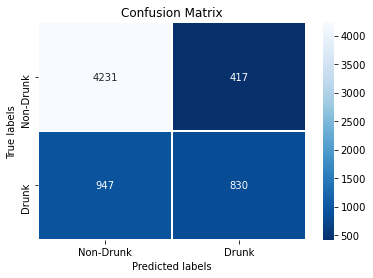

In [20]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_GB)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Drunk', 'Drunk'])
ax.yaxis.set_ticklabels(['Non-Drunk', 'Drunk']);

In [14]:
#Bagging Desicion Tree Classification
kfold = model_selection.KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()
BG = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)
results_BG = model_selection.cross_val_score(BG, X_train, y_train, cv=kfold)
BG.fit(X_train, y_train)
y_pred_BG = BG.predict(X_test)
print('Train accuracy:', BG.score(X_train, y_train))
print('Test accuracy:', BG.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_BG), 
                                                                recall_score(y_test, y_pred_BG), f1_score(y_test, y_pred_BG)))

C:\Users\EN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train accuracy: 1.0
Test accuracy: 0.7741634241245137
Precision:0.6227,   Recall:0.4654, F1:0.5327


In [15]:
# Random Forest Classification
kfold = model_selection.KFold(n_splits=10, random_state=7)
RF = RandomForestClassifier(n_estimators=100, max_features=3)
results_RF = model_selection.cross_val_score(RF, X_train, y_train, cv=kfold)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print('Train accuracy:', RF.score(X_train, y_train))
print('Test accuracy:', RF.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_RF), 
                                                                recall_score(y_test, y_pred_RF), f1_score(y_test, y_pred_RF)))

C:\Users\EN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train accuracy: 0.9999332844085663
Test accuracy: 0.7816342412451361
Precision:0.6556,   Recall:0.4434, F1:0.5290


In [16]:
# Extra Trees Classification
kfold = model_selection.KFold(n_splits=10, random_state=7)
ET = ExtraTreesClassifier(n_estimators=100, max_features=3)
results_ET = model_selection.cross_val_score(ET, X_train, y_train, cv=kfold)
ET.fit(X_train, y_train)
y_pred_ET = ET.predict(X_test)
print('Train accuracy:', ET.score(X_train, y_train))
print('Test accuracy:', ET.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_ET), 
                                                                recall_score(y_test, y_pred_ET), f1_score(y_test, y_pred_ET)))

C:\Users\EN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train accuracy: 1.0
Test accuracy: 0.775408560311284
Precision:0.6567,   Recall:0.3939, F1:0.4924


In [17]:
# AdaBoost Classification
kfold = model_selection.KFold(n_splits=10, random_state=7)
Ada = AdaBoostClassifier(n_estimators=100, random_state=7)
results_Ada = model_selection.cross_val_score(Ada, X_train, y_train, cv=kfold)
Ada.fit(X_train, y_train)
y_pred_Ada = Ada.predict(X_test)
print('Train accuracy:', Ada.score(X_train, y_train))
print('Test accuracy:', Ada.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_Ada), 
                                                                recall_score(y_test, y_pred_Ada), f1_score(y_test, y_pred_Ada)))

C:\Users\EN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train accuracy: 0.7860430982720662
Test accuracy: 0.7867704280155642
Precision:0.6614,   Recall:0.4693, F1:0.5490


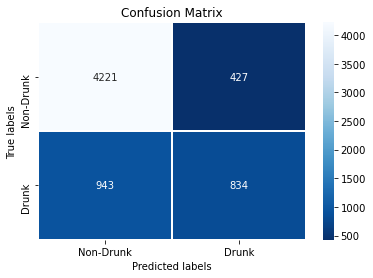

In [25]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_Ada)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Drunk', 'Drunk'])
ax.yaxis.set_ticklabels(['Non-Drunk', 'Drunk']);

In [26]:
#Stochastic Gradient Boosting
kfold = model_selection.KFold(n_splits=10, random_state=7)
SGB = GradientBoostingClassifier(n_estimators=100, random_state=7)
results_SGB = model_selection.cross_val_score(SGB, X_train, y_train, cv=kfold)
SGB.fit(X_train, y_train)
y_pred_SGB = SGB.predict(X_test)
print('Train accuracy:', SGB.score(X_train, y_train))
print('Test accuracy:', SGB.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_SGB), 
                                                                recall_score(y_test, y_pred_SGB), f1_score(y_test, y_pred_SGB)))

C:\Users\EN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train accuracy: 0.7964507305357262
Test accuracy: 0.787704280155642
Precision:0.6656,   Recall:0.4671, F1:0.5489


In [27]:
# Voting Ensemble for Classification
estimators = []
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
kfold = model_selection.KFold(n_splits=10, random_state=7)
VC = VotingClassifier(estimators)
results_VC = model_selection.cross_val_score(VC, X_train, y_train, cv=kfold)
VC.fit(X_train, y_train)
y_pred_VC = VC.predict(X_test)
print('Train accuracy:', VC.score(X_train, y_train))
print('Test accuracy:', VC.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_VC), 
                                                                recall_score(y_test, y_pred_VC), f1_score(y_test, y_pred_VC)))

C:\Users\EN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train accuracy: 1.0
Test accuracy: 0.6989883268482491
Precision:0.4574,   Recall:0.4744, F1:0.4657


In [18]:
XGB=xgb.XGBClassifier(random_state=7,learning_rate=0.01)
XGB.fit(X_train, y_train)
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)
print('Train accuracy:', XGB.score(X_train, y_train))
print('Test accuracy:', XGB.score(X_test, y_test))
print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}' .format(precision_score(y_test, y_pred_XGB), 
                                                                recall_score(y_test, y_pred_XGB), f1_score(y_test, y_pred_XGB)))

Train accuracy: 0.790112749349523
Test accuracy: 0.778988326848249
Precision:0.6445,   Recall:0.4479, F1:0.5286


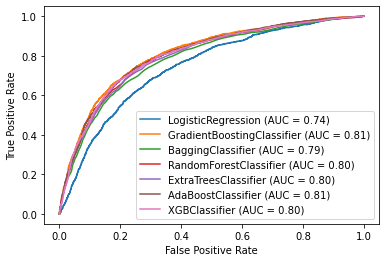

In [19]:
classifiers = [LR, GB, BG, RF, ET, Ada, XGB]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

In [22]:
data = [['LR', LR.score(X_test, y_test), f1_score(y_test, y_pred) ],['GB',GB.score(X_test, y_test), f1_score(y_test, y_pred_GB)],
        ['BG',BG.score(X_test, y_test), f1_score(y_test, y_pred_BG)], 
        ['RF', RF.score(X_test, y_test), f1_score(y_test, y_pred_RF)],['ET' ,ET.score(X_test, y_test), f1_score(y_test, y_pred_ET)], 
        ['Ada', Ada.score(X_test, y_test), f1_score(y_test, y_pred_Ada)],['XGB', XGB.score(X_test, y_test), f1_score(y_test, y_pred_XGB)]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Model', 'Test_Accuracy', 'F1']) 

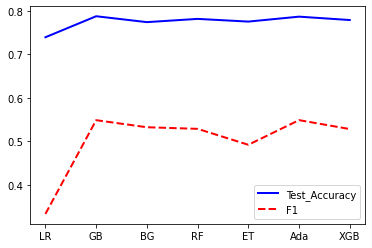

In [23]:
plt.plot( 'Model', 'Test_Accuracy', data=df, marker='', color='blue', linewidth=2)
plt.plot( 'Model', 'F1', data=df, marker='', color='red', linewidth=2, linestyle='dashed', label="F1")
plt.legend()